# Cora Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx, to_dense_adj

In [2]:
dataset = Planetoid(root="data", name="Cora")

print(f"num documents : {dataset.num_features}")
print(f"num classes : {dataset.num_classes}")

data = dataset[0]

print(f"Size information matrix : {data.x.shape}")
print(f"Size target vector : {data.y.shape}")
print(f"Size trainset : {data.train_mask.sum()}")
print(f"Size testset : {data.test_mask.sum()}")

print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')


num documents : 1433
num classes : 7
Size information matrix : torch.Size([2708, 1433])
Size target vector : torch.Size([2708])
Size trainset : 140
Size testset : 1000
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [3]:
# G = to_networkx(data, to_undirected=True)
# plt.figure(figsize=(12,12))
# plt.axis('off')
# nx.draw_networkx(G,
#                 pos=nx.spring_layout(G, seed=0),
#                 with_labels=True,
#                 node_size=8,
#                 node_color=data.y,
#                 cmap="hsv",
#                 vmin=-2,
#                 vmax=3,
#                 width=0.8,
#                 edge_color="grey",
#                 font_size=0
#                 )
# plt.show()

# Graph Convolution Network for Classification

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import accuracy

from model import GCN

In [22]:
X = data.x
y = data.y
A = to_dense_adj(data.edge_index).squeeze(0)

train_index = dataset.train_mask==True
test_index = dataset.test_mask==True

In [23]:
EPOCHS = 100
LEARNING_RATE = 1e-2

model = GCN(in_channels=dataset.num_features, hidden_dim=16, out_channels=dataset.num_classes, adj = A)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=5e-4)

In [24]:
losses = []
train_accs = []
test_accs = []

for epoch in range(EPOCHS):

    pred = model(X)
    loss = criterion(pred[train_index], y[train_index])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.detach())

    if epoch%10==0:
        with torch.no_grad():
            model.eval()

            preds = model(X)
            pred_train, y_train = preds[train_index], y[train_index]
            pred_test, y_test = preds[test_index], y[test_index]

            train_acc = accuracy(y_train, torch.argmax(pred_train, axis=1))
            test_acc = accuracy(y_test, torch.argmax(pred_test, axis=1))
            train_accs.append(train_acc)
            test_accs.append(test_acc)

            print(f"For epoch {epoch}, Train Accuracy : {train_acc}")
            print(f"For epoch {epoch}, Test Accuracy : {test_acc}")

            model.train()

For epoch 0, Train Accuracy : 0.37857142090797424
For epoch 0, Test Accuracy : 0.34599998593330383
For epoch 10, Train Accuracy : 0.9642857313156128
For epoch 10, Test Accuracy : 0.7350000143051147
For epoch 20, Train Accuracy : 0.9857142567634583
For epoch 20, Test Accuracy : 0.7900000214576721
For epoch 30, Train Accuracy : 1.0
For epoch 30, Test Accuracy : 0.7879999876022339
For epoch 40, Train Accuracy : 1.0
For epoch 40, Test Accuracy : 0.8050000071525574
For epoch 50, Train Accuracy : 1.0
For epoch 50, Test Accuracy : 0.7929999828338623
For epoch 60, Train Accuracy : 1.0
For epoch 60, Test Accuracy : 0.7950000166893005
For epoch 70, Train Accuracy : 1.0
For epoch 70, Test Accuracy : 0.8009999990463257
For epoch 80, Train Accuracy : 1.0
For epoch 80, Test Accuracy : 0.8009999990463257
For epoch 90, Train Accuracy : 1.0
For epoch 90, Test Accuracy : 0.796999990940094


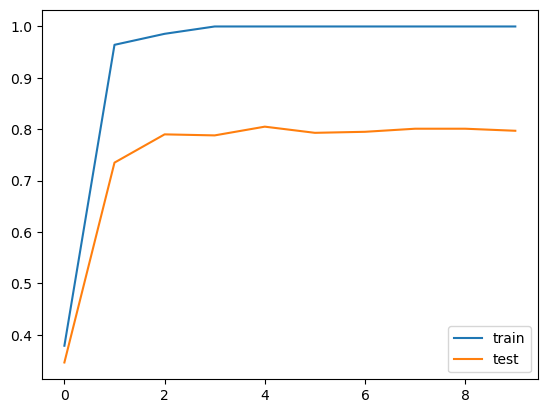

In [25]:
plt.plot(train_accs, label='train')
plt.plot(test_accs, label = 'test')
plt.legend()

# Graph Convolution Network for 2D representation

In [55]:
EPOCHS = 1000
LEARNING_RATE = 1e-2

model = GCN(in_channels=dataset.num_features, hidden_dim=2, out_channels=dataset.num_classes, adj = A, return_hidden=True)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=5e-4)

In [56]:
losses = []
train_accs = []
test_accs = []

for epoch in range(EPOCHS):

    pred, z = model(X)
    loss = criterion(pred[train_index], y[train_index])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.detach())

    if epoch%10==0:
        with torch.no_grad():
            model.eval()

            preds, z = model(X)
            pred_train, y_train = preds[train_index], y[train_index]
            pred_test, y_test = preds[test_index], y[test_index]

            train_acc = accuracy(y_train, torch.argmax(pred_train, axis=1))
            test_acc = accuracy(y_test, torch.argmax(pred_test, axis=1))
            train_accs.append(train_acc)
            test_accs.append(test_acc)

            print(f"For epoch {epoch}, Train Accuracy : {train_acc}")
            print(f"For epoch {epoch}, Test Accuracy : {test_acc}")

            model.train()

For epoch 0, Train Accuracy : 0.10000000149011612
For epoch 0, Test Accuracy : 0.21899999678134918
For epoch 10, Train Accuracy : 0.30000001192092896
For epoch 10, Test Accuracy : 0.2590000033378601
For epoch 20, Train Accuracy : 0.3928571343421936
For epoch 20, Test Accuracy : 0.37700000405311584
For epoch 30, Train Accuracy : 0.4000000059604645
For epoch 30, Test Accuracy : 0.4320000112056732
For epoch 40, Train Accuracy : 0.5285714268684387
For epoch 40, Test Accuracy : 0.5
For epoch 50, Train Accuracy : 0.6142857074737549
For epoch 50, Test Accuracy : 0.5270000100135803
For epoch 60, Train Accuracy : 0.6928571462631226
For epoch 60, Test Accuracy : 0.5320000052452087
For epoch 70, Train Accuracy : 0.7928571701049805
For epoch 70, Test Accuracy : 0.5460000038146973
For epoch 80, Train Accuracy : 0.8357142806053162
For epoch 80, Test Accuracy : 0.5609999895095825
For epoch 90, Train Accuracy : 0.8714285492897034
For epoch 90, Test Accuracy : 0.5740000009536743
For epoch 100, Train Ac

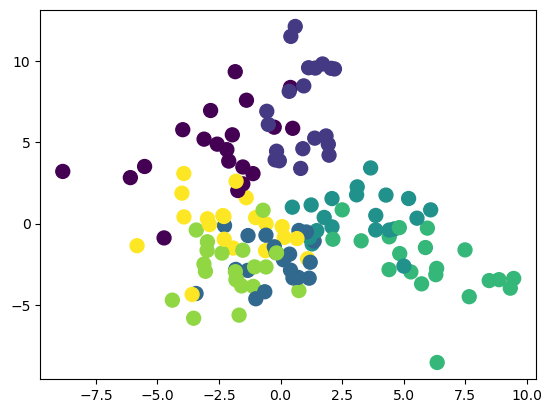

In [62]:
plt.scatter(z[train_index].T[0].detach(), z[train_index].T[1].detach(), c=y[train_index], s=100)